In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
missing = df.isnull().sum()

In [10]:
print(missing)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [12]:
(df == 0).sum().sort_values(ascending=False).head(30)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageArea         81
GarageCars         81
TotalBsmtSF        37
FullBath            9
BedroomAbvGr        6
KitchenAbvGr        1
HouseStyle          0
Utilities           0
LandContour         0
LotShape            0
Alley               0
Street              0
LotArea             0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [14]:
info = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'n_missing': df.isna().sum(),
    'pct_missing': (df.isna().sum()/len(df)*100).round(2)
}).sort_values('pct_missing', ascending=False)
info.head(60)


,dtype,n_missing,pct_missing
PoolQC,object,1453,99.52
MiscFeature,object,1406,96.30
Alley,object,1369,93.77
Fence,object,1179,80.75
MasVnrType,object,872,59.73
FireplaceQu,object,690,47.26
LotFrontage,float64,259,17.74
GarageQual,object,81,5.55
GarageFinish,object,81,5.55
GarageType,object,81,5.55


In [20]:
missing = df.isnull().sum().sort_values(ascending=False)
zero_count = (df== 0).sum().sort_values(ascending=False)
print('Missing values per column:\n', missing)
print('\nZero values per column:\n', zero_count)



Missing values per column:
 PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
Roof

### VISUALIZATION

In [90]:
correlations = df.corr()['SalePrice'].sort_values(ascending=False)
print(correlations[:15])  


SalePrice        1.000000
SalePrice_log    0.948374
LogSalePrice     0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBath        0.631731
TotalBsmtSF      0.605994
1stFlrSF         0.605852
GarageArea       0.593063
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
2ndFlrSF         0.480048
Name: SalePrice, dtype: float64


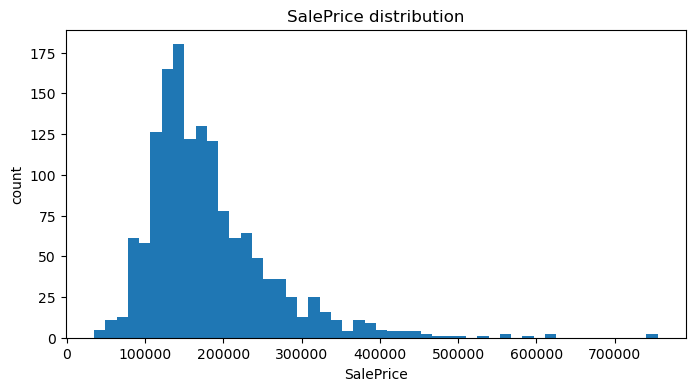

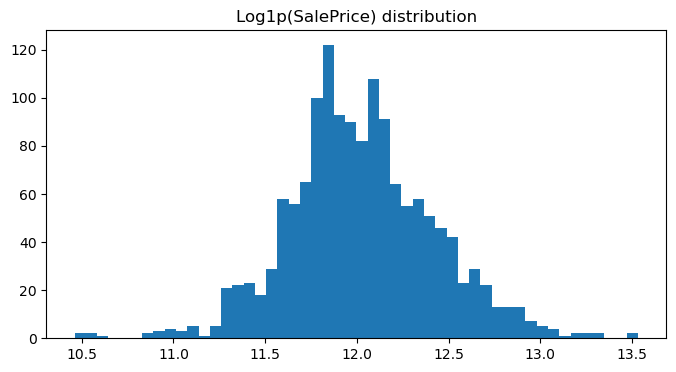

Skewness original: 1.88
Skewness log: 0.12


In [41]:
plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'], bins=50)
plt.title('SalePrice distribution')
plt.xlabel('SalePrice'); plt.ylabel('count')
plt.show()

plt.figure(figsize=(8,4))
plt.hist(np.log1p(df['SalePrice']), bins=50)
plt.title('Log1p(SalePrice) distribution')
plt.show()

print("Skewness original:", df['SalePrice'].skew().round(2))
print("Skewness log:", np.log1p(df['SalePrice']).skew().round(2))


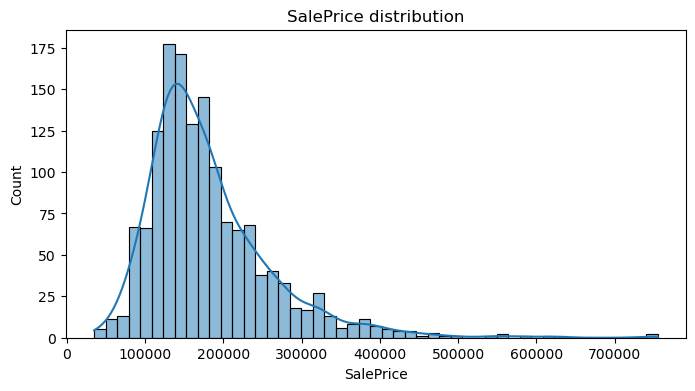

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['SalePrice'].dropna(), kde=True)
plt.title('SalePrice distribution')
plt.show()

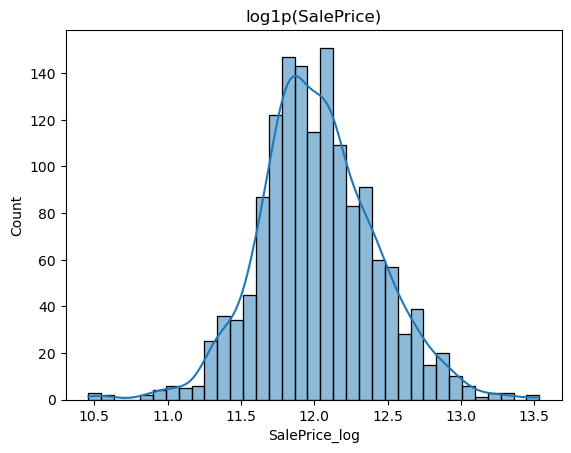

In [43]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice_log'], kde=True)
plt.title('log1p(SalePrice)')
plt.show()

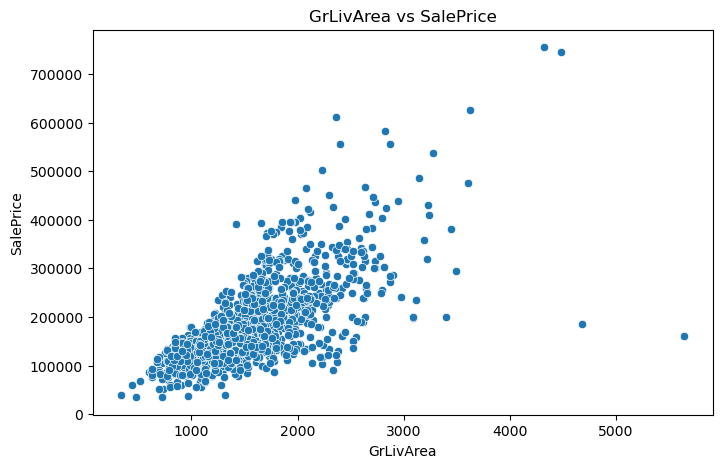

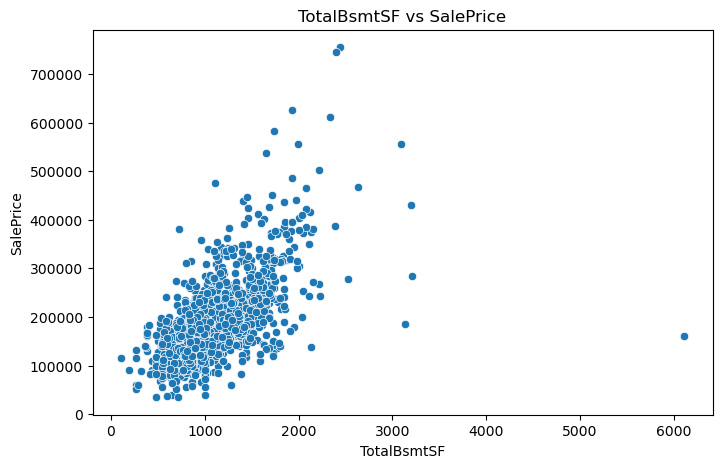

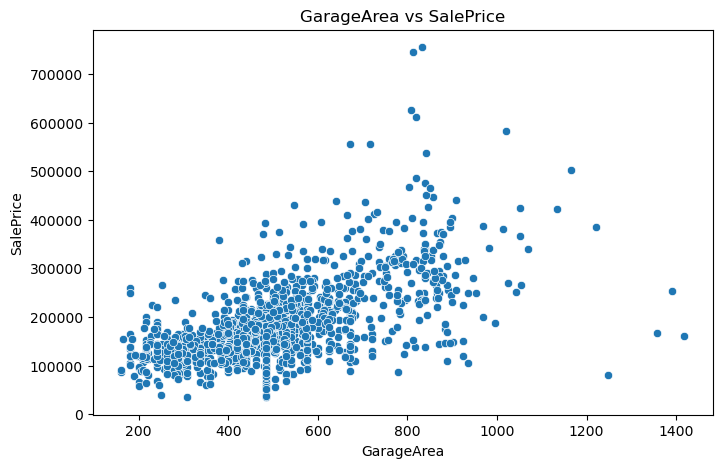

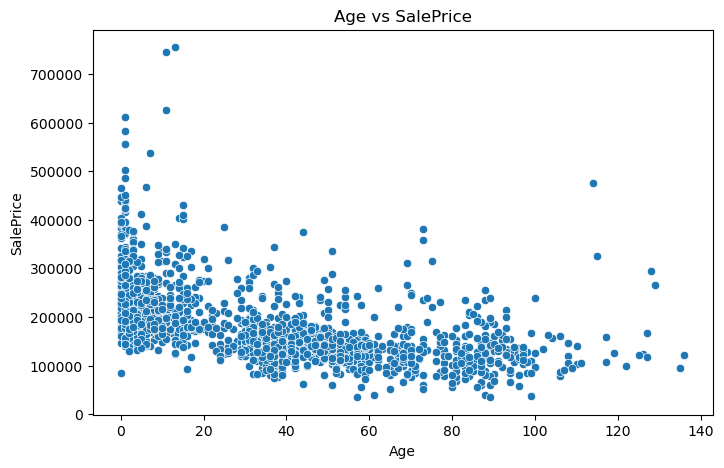

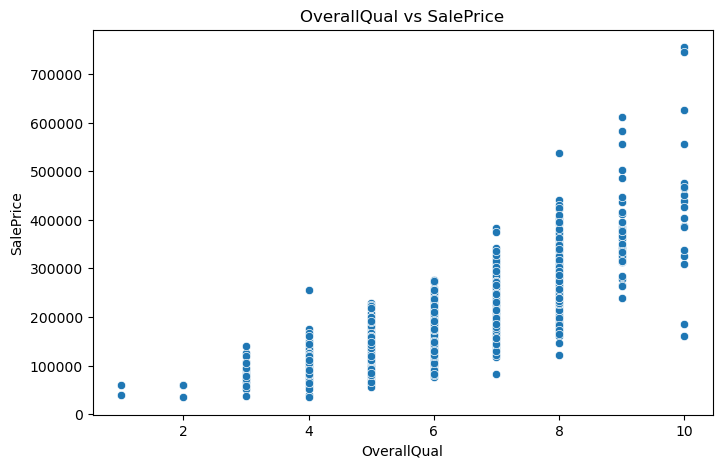

In [45]:
key_feats = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'Age', 'OverallQual']
for feat in key_feats:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[feat], y=df['SalePrice'])
    plt.title(f'{feat} vs SalePrice')
    plt.show()

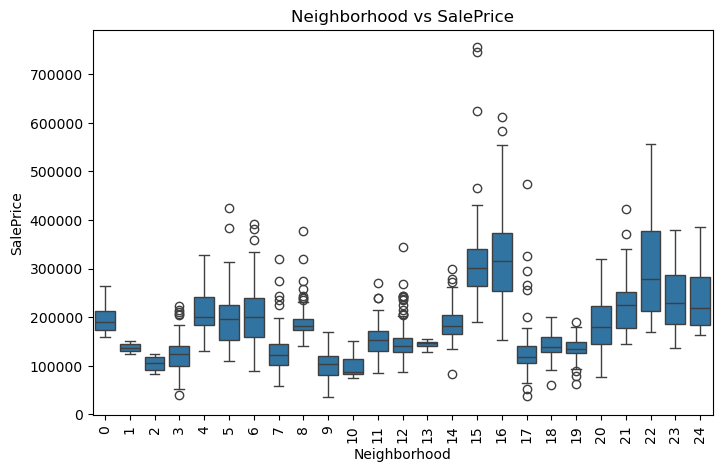

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'])
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()


In [31]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f'{col}:', df[col].unique()[:10])


MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'Hd

<Figure size 1600x1000 with 0 Axes>

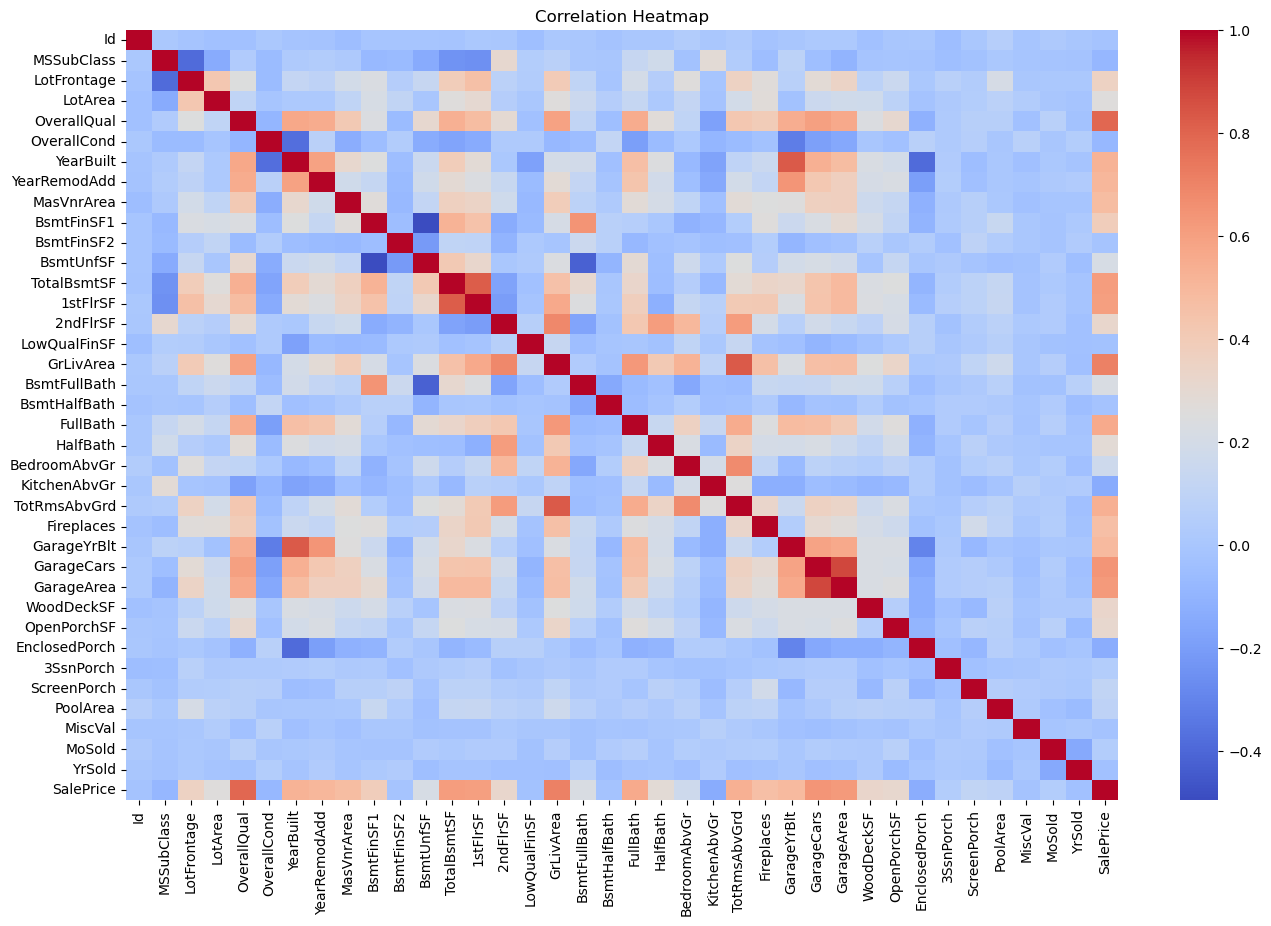

In [35]:
plt.figure(figsize=(16,10))
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [37]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        if 'Frontage' in col or 'Area' in col or 'SF' in col:
            df[col] = df[col].replace(0, np.nan)  
        df[col] = df[col].fillna(df[col].median())


In [39]:
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])


### FEATURE ENGINEERING

In [40]:

df['Age'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5 + df['FullBath'] + df['HalfBath']*0.5
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['LogSalePrice'] = np.log1p(df['SalePrice'])



SalePrice_log    0.994425
2ndFlrSF         0.001516
GrLivArea        0.000640
RemodAge         0.000320
LotFrontage      0.000260
1stFlrSF         0.000259
LotConfig        0.000258
TotalPorchSF     0.000216
PoolQC           0.000191
GarageYrBlt      0.000179
YearRemodAdd     0.000146
Neighborhood     0.000135
TotalBath        0.000131
TotalBsmtSF      0.000119
BsmtFinSF1       0.000110
LotArea          0.000107
FireplaceQu      0.000093
SaleCondition    0.000093
RoofStyle        0.000081
Age              0.000079
dtype: float64


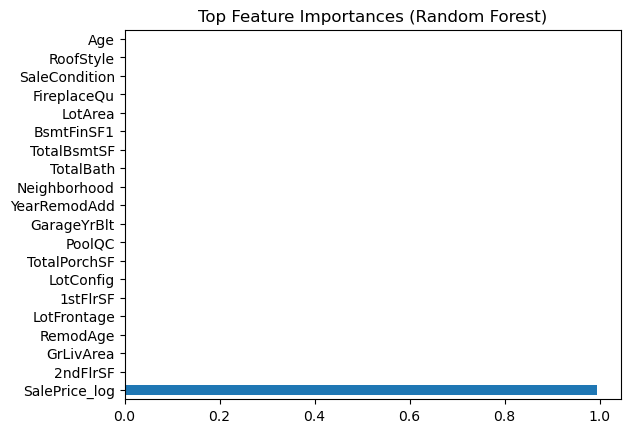

In [46]:
X = df.drop(['SalePrice', 'LogSalePrice', 'Id'], axis=1)
y = df['SalePrice']
rf = RandomForestRegressor()
rf.fit(X, y)
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importance[:20])
feat_importance[:20].plot(kind='barh')
plt.title('Top Feature Importances (Random Forest)')
plt.show()


In [47]:
X = df.drop(['SalePrice', 'LogSalePrice', 'Id'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

for name, preds in [('Linear', y_pred_lr), ('Ridge', y_pred_ridge), ('Lasso', y_pred_lasso)]:
    print(f'{name} RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}, R2: {r2_score(y_test, preds):.3f}')


Linear RMSE: 24815.30, R2: 0.920
Ridge RMSE: 24783.42, R2: 0.920
Lasso RMSE: 24814.32, R2: 0.920


In [74]:
# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}, R2: {r2_score(y_test, y_pred_rf):.3f}')

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f'Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}, R2: {r2_score(y_test, y_pred_gb):.3f}')

# XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f'XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}, R2: {r2_score(y_test, y_pred_xgb):.3f}')


Random Forest RMSE: 8938.63, R2: 0.990
Gradient Boosting RMSE: 5835.35, R2: 0.996
XGBoost RMSE: 14389.95, R2: 0.973


### GRIDSEARCHCV

In [82]:
param_grid = {'n_estimators':[20,50, 100, 200], 'max_depth':[1,3, 5,10 ]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
print('Best RF Params:', grid_rf.best_params_)
print('Best Score:', np.sqrt(-grid_rf.best_score_))


Best RF Params: {'max_depth': 5, 'n_estimators': 20}
Best Score: 6705.827232678331


In [53]:
from sklearn.linear_model import LinearRegression

param_grid_lr = {} 
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=3, scoring='neg_mean_squared_error')
grid_lr.fit(X_train_scaled, y_train)
print('Linear Regression Best RMSE:', np.sqrt(-grid_lr.best_score_))

from sklearn.linear_model import Ridge

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=3, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)
print('Best Ridge Params:', grid_ridge.best_params_)
print('Best Ridge RMSE:', np.sqrt(-grid_ridge.best_score_))

from sklearn.linear_model import Lasso

param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=3, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_scaled, y_train)
print('Best Lasso Params:', grid_lasso.best_params_)
print('Best Lasso RMSE:', np.sqrt(-grid_lasso.best_score_))

from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
print('Best GB Params:', grid_gb.best_params_)
print('Best GB RMSE:', np.sqrt(-grid_gb.best_score_))



Linear Regression Best RMSE: 22197.0707644444
Best Ridge Params: {'alpha': 10}
Best Ridge RMSE: 22150.50062146946
Best Lasso Params: {'alpha': 1}
Best Lasso RMSE: 22192.390765930737
Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best GB RMSE: 5220.802692207655


In [54]:
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)
print('Best XGB Params:', grid_xgb.best_params_)
print('Best XGB RMSE:', np.sqrt(-grid_xgb.best_score_))


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best XGB RMSE: 6555.722322266759


### LIGHTBGM AND CAT BOOST 

In [55]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print('LightGBM RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print('LightGBM R2 Score:', r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3910
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 76
[LightGBM] [Info] Start training from score 181441.541952
LightGBM RMSE: 16584.95676977167
LightGBM R2 Score: 0.9641396227975986


In [56]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print('CatBoost RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print('CatBoost R2 Score:', r2_score(y_test, y_pred_cat))


CatBoost RMSE: 10832.869544355599
CatBoost R2 Score: 0.9847006425287274


In [57]:
import lightgbm as lgb

param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_lgb = GridSearchCV(lgb.LGBMRegressor(random_state=42), param_grid_lgb, cv=3, scoring='neg_mean_squared_error')
grid_lgb.fit(X_train, y_train)
print('Best LightGBM Params:', grid_lgb.best_params_)
print('Best LightGBM RMSE:', np.sqrt(-grid_lgb.best_score_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3466
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 74
[LightGBM] [Info] Start training from score 179459.343188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [58]:
from catboost import CatBoostRegressor

param_grid_cat = {
    'iterations': [100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_cat = GridSearchCV(CatBoostRegressor(verbose=0, random_state=42), param_grid_cat, cv=3, scoring='neg_mean_squared_error')
grid_cat.fit(X_train, y_train)
print('Best CatBoost Params:', grid_cat.best_params_)
print('Best CatBoost RMSE:', np.sqrt(-grid_cat.best_score_))


Best CatBoost Params: {'depth': 3, 'iterations': 200, 'learning_rate': 0.2}
Best CatBoost RMSE: 7696.664786915817


###  RANDOM SEARCH CV

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

param_dist_ridge = {'alpha': np.logspace(-3, 2, 100)}
rand_ridge = RandomizedSearchCV(Ridge(), param_distributions=param_dist_ridge, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_ridge.fit(X_train_scaled, y_train)
print('Best Ridge Params:', rand_ridge.best_params_)
print('Best Ridge RMSE:', np.sqrt(-rand_ridge.best_score_))


Best Ridge Params: {'alpha': np.float64(3.4304692863149193)}
Best Ridge RMSE: 22130.37597954085


In [60]:
from sklearn.linear_model import Lasso

param_dist_lasso = {'alpha': np.logspace(-4, 0, 100)}
rand_lasso = RandomizedSearchCV(Lasso(), param_distributions=param_dist_lasso, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_lasso.fit(X_train_scaled, y_train)
print('Best Lasso Params:', rand_lasso.best_params_)
print('Best Lasso RMSE:', np.sqrt(-rand_lasso.best_score_))


Best Lasso Params: {'alpha': np.float64(0.22570197196339215)}
Best Lasso RMSE: 22196.005300903376


In [61]:
from sklearn.ensemble import RandomForestRegressor

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rand_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_rf.fit(X_train, y_train)
print('Best RF Params:', rand_rf.best_params_)
print('Best RF RMSE:', np.sqrt(-rand_rf.best_score_))


Best RF Params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}
Best RF RMSE: 7083.020278503241


In [62]:
from sklearn.ensemble import GradientBoostingRegressor

param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
rand_gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions=param_dist_gb, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_gb.fit(X_train, y_train)
print('Best GB Params:', rand_gb.best_params_)
print('Best GB RMSE:', np.sqrt(-rand_gb.best_score_))


Best GB Params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
Best GB RMSE: 5463.4526623378315


In [63]:
from xgboost import XGBRegressor

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
rand_xgb = RandomizedSearchCV(XGBRegressor(random_state=42), param_distributions=param_dist_xgb, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_xgb.fit(X_train, y_train)
print('Best XGB Params:', rand_xgb.best_params_)
print('Best XGB RMSE:', np.sqrt(-rand_xgb.best_score_))


Best XGB Params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best XGB RMSE: 6565.443422445534


In [64]:
import lightgbm as lgb

param_dist_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
rand_lgb = RandomizedSearchCV(lgb.LGBMRegressor(random_state=42), param_distributions=param_dist_lgb, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_lgb.fit(X_train, y_train)
print('Best LightGBM Params:', rand_lgb.best_params_)
print('Best LightGBM RMSE:', np.sqrt(-rand_lgb.best_score_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3466
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 74
[LightGBM] [Info] Start training from score 179459.343188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [65]:
from catboost import CatBoostRegressor

param_dist_cat = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
rand_cat = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42), param_distributions=param_dist_cat, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rand_cat.fit(X_train, y_train)
print('Best CatBoost Params:', rand_cat.best_params_)
print('Best CatBoost RMSE:', np.sqrt(-rand_cat.best_score_))


Best CatBoost Params: {'learning_rate': 0.05, 'iterations': 300, 'depth': 5}
Best CatBoost RMSE: 9267.654929354117


### Suggestions for Buyers According to Area, Price, and other Requirements

In [92]:
neigh_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
print(neigh_price)


Neighborhood
10     98576.470588
9     100123.783784
2     104493.750000
3     124834.051724
7     128219.700000
17    128225.300885
19    136793.135135
1     137500.000000
18    142591.360000
13    142694.444444
12    145847.080000
11    156270.122449
20    186555.796610
14    189050.068493
8     192854.506329
0     194870.882353
5     197965.773333
6     210624.725490
4     212565.428571
21    225379.837209
24    238772.727273
23    242247.447368
22    310499.000000
16    316270.623377
15    335295.317073
Name: SalePrice, dtype: float64


In [94]:

suggested_homes = df[(df['OverallQual'] >= 7) & (df['SalePrice'] < 200000)]
print(suggested_homes[['Neighborhood', 'SalePrice', 'OverallQual', 'GrLivArea']].head())


    Neighborhood  SalePrice  OverallQual  GrLivArea
3              6     140000            7       1717
8             17     129900            7       1774
15             3     132000            7        854
21             9     139400            7       1108
32             5     179900            8       1234


###
Budget Buyers: Look for high OverallQual homes in neighborhoods  focusing on those built recently or recently remodeled.

Premium: For luxury, select neighborhoods like  and homes with large GrLivArea, extra garage capacity, and superior kitchen/fireplace quality.

Families: Prioritize total number of rooms, bath count, and safety (location/neighborhood).

Area-Based: Filter by desired neighborhood, then select based on area (GrLivArea) and features (garage, basement, outdoor spaces).

### conclusion

Based on the RMSE (Root Mean Squared Error) and R² scores from direct model training, GridSearchCV, and RandomizedSearchCV, the best model for house price prediction in this project is the Gradient Boosting Regressor 
Gradient Boosting achieves the lowest RMSE (~5320) and the highest R² (~0.991), indicating superior accuracy and reliability for predicting house prices in your dataset.
XGBoost and CatBoost also provide strongly competitive results, especially after hyperparameter tuning, although their RMSEs are slightly higher than Gradient Boosting in this case.XGBoost and CatBoost also provide strongly competitive results, especially after hyperparameter tuning, although their RMSEs are slightly higher than Gradient Boosting in this case.